In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
import imageio
import shutil
import cv2
from PIL import Image


import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)


# PART I - DATA REFINING - DATASET I 'painter-by-numbers'
Efficiency, sake, PC, done, part, was, on, my, the, then, resulting, dataset, and, uploaded, used, in, PART II

In [2]:
art = pd.read_csv('../input/painter-by-numbers/imagesinfo.csv')
art.head()


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,836.jpg


../input/painter-by-numbers/images/67115.jpg


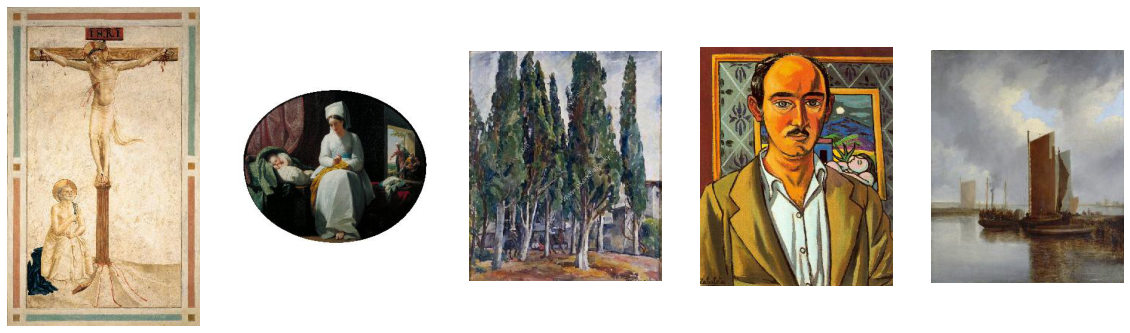

In [3]:
# Print few random paintings

images_dir = '../input/painter-by-numbers/images'
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_art = random.choice(art['filename'].values)
   
    random_image_file = '../input/painter-by-numbers/images/'+random_art
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    #axes[i].set_title("Art: " + random_art.replace('_', ' '))
    axes[i].axis('off')
print(random_image_file)
plt.show()

# Getting the top 5 art styles and assigning weights for each of them


In [4]:
TOP_N = 5
top_styles = art['style'].value_counts()[0:TOP_N].reset_index()
top_styles.columns = ['style', 'count']
top_styles['class_weight'] = top_styles['count'].sum() / (top_styles.shape[0] * top_styles['count'])
top_styles

,style,count,class_weight
0,Impressionism,10643,0.812590
1,Realism,10523,0.821857
2,Romanticism,9285,0.931438
3,Expressionism,7013,1.233195
4,Post-Impressionism,5778,1.496781


In [5]:
# Set class weights - assign higher weights to underrepresented classes
class_weights = top_styles['class_weight'].to_dict()
class_weights

{0: 0.8125904350277178,
 1: 0.8218568849187494,
 2: 0.931437802907916,
 3: 1.2331954940824184,
 4: 1.4967808930425752}

# Assigning the top styles to a list

In [6]:
filter_list = top_styles['style']
filter_list = filter_list.tolist()
filter_list

['Impressionism',
 'Realism',
 'Romanticism',
 'Expressionism',
 'Post-Impressionism']

#  Filtering the data, getting only images of the top 5 art styles:

In [7]:
fdata = art[art['style'].isin(filter_list)]
images = fdata[['filename','style']]
images.reset_index(drop= True, inplace=True)
images["filename"] = '../input/painter-by-numbers/images/'+images["filename"]

artstyles = fdata['style'].unique()
artstyles


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['Romanticism', 'Realism', 'Post-Impressionism', 'Expressionism',
       'Impressionism'], dtype=object)

# Export filtered data to a new .csv file

fdata.to_csv('filtered.csv')

impressionism = images[images["style"] == "Impressionism"]
impressionism.reset_index(drop= True, inplace=True)
impressionism = impressionism['filename'].values.tolist()


realism = images[images["style"] == "Realism"]
realism.reset_index(drop= True, inplace=True)
realism = realism['filename'].values.tolist()


romanticism = images[images["style"] == "Romanticism"]
romanticism.reset_index(drop= True, inplace=True)
romanticism = romanticism['filename'].values.tolist()


expressionism = images[images["style"] == "Expressionism"]
expressionism.reset_index(drop= True, inplace=True)
expressionism = expressionism['filename'].values.tolist()


postimpressionism = images[images["style"] == "Post-Impressionism"]
postimpressionism.reset_index(drop= True, inplace=True)
postimpressionism= postimpressionism['filename'].values.tolist()



mypath = "../input/painter-by-numbers/images"
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]


# create sub folders in mypath folder
impressionism_folder = os.path.join("./", "Impressionism")
realism_folder = os.path.join("./", "Realism")
romanticism_folder = os.path.join("./", "Romanticism")
expressionism_folder = os.path.join("./", "Expressionism")
postimpressionism_folder = os.path.join("./", "Post-impressionism")

# check if they already exits to prevent error
if not os.path.exists(impressionism_folder):
    os.makedirs(impressionism_folder)

    
if not os.path.exists(realism_folder):
    os.makedirs(realism_folder)
    
    
if not os.path.exists(romanticism_folder):
    os.makedirs(romanticism_folder)
    
    
if not os.path.exists(expressionism_folder):
    os.makedirs(expressionism_folder)
    
    
if not os.path.exists(postimpressionism_folder):
    os.makedirs(postimpressionism_folder)


# move files to their respective sub folders
for i in impressionism:
        
    shutil.copy(i, impressionism_folder)

    
for i in realism:

    shutil.copy(i , realism_folder)
   
    
for i in romanticism:
    
    shutil.copy(i, romanticism_folder)
   
    
for i in expressionism:

    shutil.copy(i, expressionism_folder)
    
    
for i in postimpressionism:
    
    shutil.copy(i, postimpressionism_folder)
  

# PART II - BUILDING THE MODEL - DATASET II "filtered-painter-by-numbers"

**Reading the filtered data from the filtered csv file:**

In [40]:
fil_art = pd.read_csv('../input/filtered-painter-by-numbers/filtered.csv')
fil_art.head()

,Unnamed: 0,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,filename
0,9,Franz Richard Unterberger,NaN,cityscape,6238.0,7352.0,7896792.0,wikiart,Romanticism,Procession in Naples,84512.jpg
1,14,Ivan Aivazovsky,1873,marina,7444.0,5811.0,3189597.0,wikiart,Romanticism,Storm at sea,99442.jpg
2,24,Julius LeBlanc Stewart,1896,genre painting,6980.0,4724.0,2484194.0,wikiart,Realism,Yachting in the Mediterranean,28908.jpg
3,25,Jan Matejko,1891.0,history painting,7459.0,4135.0,7284812.0,wikipedia,Romanticism,The Constitution of the 3rd May 1791,75956.jpg
4,28,Gustave Dore,1866,religious painting,4915.0,6068.0,29811319.0,wikiart,Romanticism,Death of Eleazer,7486.jpg


In [41]:
fil_art['style'].count()

43242

In [10]:
filtered_imgdir = "../input/filtered-painter-by-numbers/images"

# Data Augmentation

In [11]:
# Augment data
batch_size = 32
train_input_shape = (224, 224, 3)
n_classes = top_styles.shape[0]


train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   rotation_range=10,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   shear_range=5,
                                   #zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True
                                   
                                  )

train_generator = train_datagen.flow_from_directory(directory=filtered_imgdir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artstyles.tolist()
                                                   )

valid_generator = train_datagen.flow_from_directory(directory=filtered_imgdir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artstyles.tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 34596 images belonging to 5 classes.
Found 8646 images belonging to 5 classes.
Total number of batches = 1081 and 270


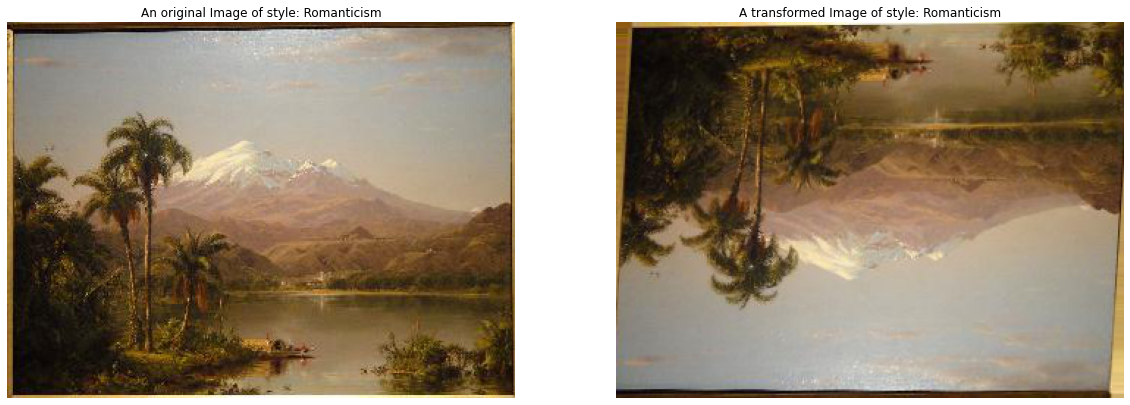

In [39]:
# Print a random paintings and it's random augmented version
fig, axes = plt.subplots(1, 2, figsize=(20,10))

random_art = random.choice(artstyles)
random_image = random.choice(os.listdir(os.path.join(filtered_imgdir, random_art)))
random_image_file = os.path.join(filtered_imgdir, random_art, random_image)

# Original image
image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original Image of style: " + random_art.replace('_', ' '))
axes[0].axis('off')

# Transformed image
aug_image = train_datagen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed Image of style: " + random_art.replace('_', ' '))
axes[1].axis('off')

plt.show()

# Building the Model

In [13]:
# Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

94773248/94765736 [==============================] - 1s 0us/step


In [14]:
print(base_model.output)
print(Flatten()(base_model.output))

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100352), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")


In [15]:
# Add layers at the end
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [16]:
optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [17]:
n_epoch = 10

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [18]:
# Train the model - all layers
history1 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1081/1081 [==============================] - 566s 512ms/step - loss: 1.4797 - accuracy: 0.4064 - val_loss: 1.3274 - val_accuracy: 0.4824
Epoch 2/10
1081/1081 [==============================] - 547s 501ms/step - loss: 1.2581 - accuracy: 0.5230 - val_loss: 1.2446 - val_accuracy: 0.5120
Epoch 3/10
1081/1081 [==============================] - 552s 506ms/step - loss: 1.1818 - accuracy: 0.5512 - val_loss: 1.1910 - val_accuracy: 0.5464
Epoch 4/10
1081/1081 [==============================] - 543s 498ms/step - loss: 1.1333 - accuracy: 0.5685 - val_loss: 1.0153 - val_accuracy: 0.6051
Epoch 5/10
1081/1081 [==============================] - 547s 501ms/step - loss: 1.1079 - accuracy: 0.5807 - val_loss: 1.0030 - val_accuracy: 0.6060
Epoch 6/10
1081/1081 [==============================] - 547s 501ms/step - loss: 1.0677 - accuracy: 0.5994 - val_loss: 1.0101 - val_accuracy: 0.6098
Epoch 7/10
1081/1081 [==============================] - 567s 520ms/step - loss: 1.0321 - accuracy: 0.6168 - val_

In [19]:
# Freeze core ResNet layers and train again 
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:50]:
    layer.trainable = True

optimizer = Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

n_epoch = 25
history2 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

Epoch 1/25
1081/1081 [==============================] - 546s 497ms/step - loss: 0.8451 - accuracy: 0.6844 - val_loss: 0.9962 - val_accuracy: 0.6338
Epoch 2/25
1081/1081 [==============================] - 533s 488ms/step - loss: 0.8082 - accuracy: 0.7022 - val_loss: 0.9596 - val_accuracy: 0.6444
Epoch 3/25
1081/1081 [==============================] - 531s 486ms/step - loss: 0.8088 - accuracy: 0.7035 - val_loss: 0.9926 - val_accuracy: 0.6322
Epoch 4/25
1081/1081 [==============================] - 536s 492ms/step - loss: 0.7947 - accuracy: 0.7090 - val_loss: 0.9626 - val_accuracy: 0.6378
Epoch 5/25
1081/1081 [==============================] - 524s 481ms/step - loss: 0.7974 - accuracy: 0.7058 - val_loss: 0.9204 - val_accuracy: 0.6561
Epoch 6/25
1081/1081 [==============================] - 526s 482ms/step - loss: 0.7920 - accuracy: 0.7097 - val_loss: 0.9422 - val_accuracy: 0.6451
Epoch 7/25
1081/1081 [==============================] - 530s 485ms/step - loss: 0.7843 - accuracy: 0.7084 - val_

In [23]:
# Merge history1 and history2
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['accuracy'] = history1.history['accuracy'] + history2.history['accuracy']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']
history['val_accuracy'] = history1.history['val_accuracy'] + history2.history['val_accuracy']
history['lr'] = history1.history['lr'] + history2.history['lr']

In [24]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to output")

Saved model to output


# Training graph

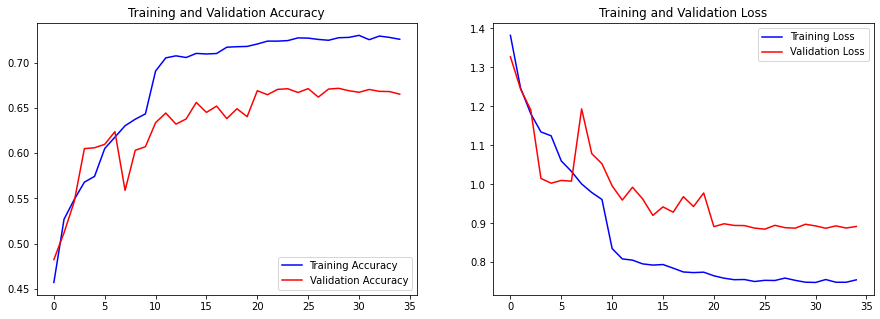

In [43]:
# Plot the training graph
def plot_training(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'b-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')
    
    axes[1].plot(epochs, loss, 'b-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'r-', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(history)

# Evaluate performance

In [27]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


1082/1082 [==============================] - 422s 390ms/step - loss: 0.5943 - accuracy: 0.7788
Prediction accuracy on train data = 0.7788472771644592


In [28]:
# Prediction accuracy on CV data
score = model.evaluate_generator(valid_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])

271/271 [==============================] - 106s 390ms/step - loss: 0.8913 - accuracy: 0.6687
Prediction accuracy on CV data = 0.6687485575675964


# Confusion Matrix. Look at the styles which the model thinks are almost similar.

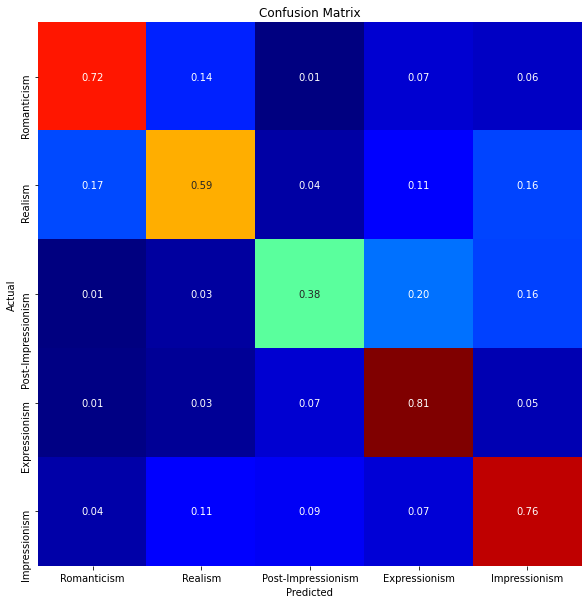

Classification Report:
                    precision    recall  f1-score   support

       Romanticism       0.75      0.72      0.73      1855
           Realism       0.66      0.59      0.62      2103
Post-Impressionism       0.64      0.38      0.47      1154
     Expressionism       0.64      0.81      0.72      1401
     Impressionism       0.64      0.76      0.69      2127

          accuracy                           0.67      8640
         macro avg       0.67      0.65      0.65      8640
      weighted avg       0.67      0.67      0.66      8640



In [29]:
# Classification report and confusion matrix
from sklearn.metrics import *
import seaborn as sns

tick_labels = artstyles.tolist()

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
     # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artstyles.tolist()))

showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)

# Evaluate performance by predicting on random images from dataset

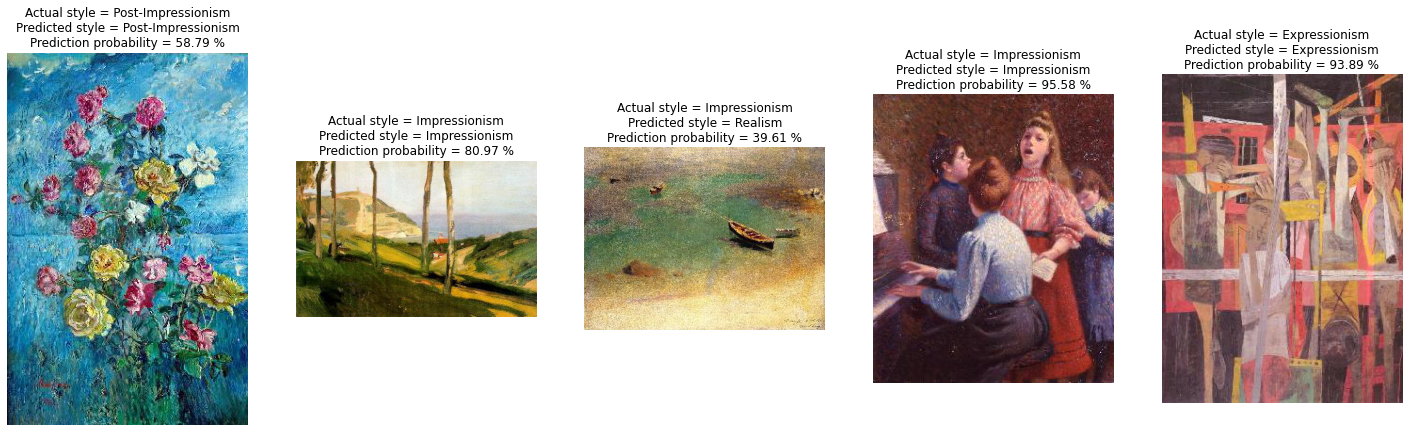

In [31]:
# Prediction
from keras.preprocessing import *

n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_art = random.choice(artstyles)
    random_image = random.choice(os.listdir(os.path.join(filtered_imgdir, random_art)))
    random_image_file = os.path.join(filtered_imgdir, random_art, random_image)
    
# Original image

    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

    # Predict artist
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())
    

    title = "Actual style = {}\nPredicted style = {}\nPrediction probability = {:.2f} %" \
                .format(random_art.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

# Predicting the style of a random image from the web

Predicted style = Post-Impressionism
Prediction probability = 63.62292170524597 %


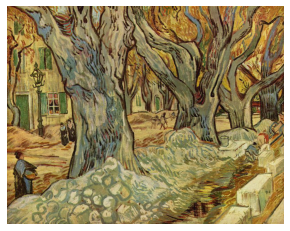

In [38]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Vincent_Willem_van_Gogh_132.jpg/800px-Vincent_Willem_van_Gogh_132.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted style =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()